
# [](http://)Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

# Data Dictionary

We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

Train file:

CSV containing the item outlet information with a sales value

**Variable Description**

1. ItemIdentifier ---- Unique product ID
1. ItemWeight ---- Weight of product
1. ItemFatContent ---- Whether the product is low fat or not
1. ItemVisibility ---- The % of the total display area of all products in a store allocated to the particular product
1. ItemType ---- The category to which the product belongs
1. ItemMRP ---- Maximum Retail Price (list price) of the product
1. OutletIdentifier ---- Unique store ID
1. OutletEstablishmentYear ---- The year in which the store was established
1. OutletSize ---- The size of the store in terms of ground area covered
1. OutletLocationType ---- The type of city in which the store is located
1. *OutletType ---- Whether the outlet is just a grocery store or some sort of supermarket
1. ItemOutletSales ---- sales of the product in t particular store. This is the outcome variable to be predicted.

Test file:
CSV containing item outlet combinations for which sales need to be forecasted

Variable Description
ItemIdentifier ----- Unique product ID
ItemWeight ---- Weight of product
ItemFatContent ----- Whether the product is low fat or not
ItemVisibility ---- The % of the total display area of all products in a store allocated to the particular product
ItemType ---- The category to which the product belongs
ItemMRP ----- Maximum Retail Price (list price) of the product
OutletIdentifier ----- Unique store ID
OutletEstablishmentYear ----- The year in which store store was established
OutletSize ----- The size of the store in terms of ground area covered
OutletLocationType ---- The type of city in which the store is located
OutletType ---- whether the outlet is just a grocery store or some sort of supermarket

Submission file format
Variable Description
ItemIdentifier ----- Unique product ID
OutletIdentifier ----- Unique store ID
ItemOutletSales ----- Sales of the product in t particular store. This is the outcome variable to be predicted.

# Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Data

In [2]:
train_data=pd.read_csv('/kaggle/input/big-mart-sales-prediction-datasets/train.csv')
test_data=pd.read_csv('/kaggle/input/big-mart-sales-prediction-datasets/test.csv')
sample_data=pd.read_csv('/kaggle/input/big-mart-sales-prediction-datasets/sample_submission.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.shape

(8523, 12)

In [6]:
test_data.shape

(5681, 11)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns. Columns of Train set have dependent and independent variables where Test set have only independent variables

In [9]:
train_data.isnull().apply(lambda x: (x.sum(), x.sum()/train_data.shape[0] *100)).transpose()

,0,1
Item_Identifier,0.0,0.000000
Item_Weight,1463.0,17.165317
Item_Fat_Content,0.0,0.000000
Item_Visibility,0.0,0.000000
Item_Type,0.0,0.000000
Item_MRP,0.0,0.000000
Outlet_Identifier,0.0,0.000000
Outlet_Establishment_Year,0.0,0.000000
Outlet_Size,2410.0,28.276428
Outlet_Location_Type,0.0,0.000000


*We have 17.16 % and 28.27 % of missing values in Item weight and Outlet_Size columns respectively in Train Datasets.*

In [10]:
test_data.isnull().apply(lambda x: (x.sum(), x.sum()/test_data.shape[0] *100)).transpose()

,0,1
Item_Identifier,0.0,0.000000
Item_Weight,976.0,17.180074
Item_Fat_Content,0.0,0.000000
Item_Visibility,0.0,0.000000
Item_Type,0.0,0.000000
Item_MRP,0.0,0.000000
Outlet_Identifier,0.0,0.000000
Outlet_Establishment_Year,0.0,0.000000
Outlet_Size,1606.0,28.269671
Outlet_Location_Type,0.0,0.000000


*We have 17% and 28% of missing values in Item weight and Outlet_Size columns in Test Dataset, i.e. around same of Train dataset*

In [11]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [12]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Data Clean

*1.Missing Value Handling : Missing data in the training data set can make the model biased.*

*2.Fix irregularities in Columns*

# 1. Item Weight

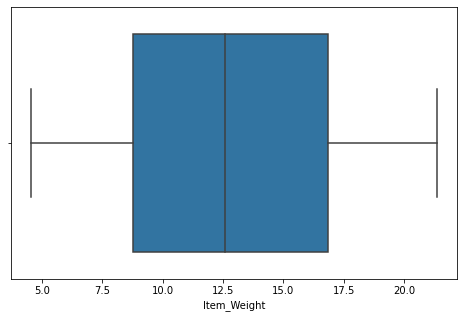

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=train_data)
plt.show()

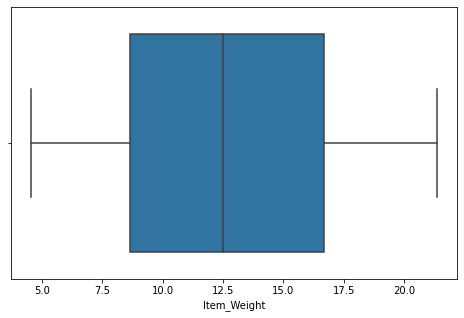

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=test_data)
plt.show()

# The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [15]:
train_data['Item_Weight']= train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
test_data['Item_Weight']= test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [16]:
train_data['Item_Weight'].isnull().sum(),test_data['Item_Weight'].isnull().sum()

(0, 0)

**We have succesfully imputed the missing values from the column Item_Weight.**

# 2. Outlet Size

In [17]:
train_data['Outlet_Size'].isnull().sum(),test_data['Outlet_Size'].isnull().sum()

(2410, 1606)

In [18]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
test_data['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

**Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.**

In [20]:
train_data['Outlet_Size']= train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])
test_data['Outlet_Size']= test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])

In [21]:
train_data['Outlet_Size'].isnull().sum(),test_data['Outlet_Size'].isnull().sum()

(0, 0)

**We have succesfully imputed the missing values from the column Outlet_Size.**

# 3. Item Fat Content

In [22]:
train_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
test_data.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

**We see there are some irregularities in the column and it is needed to fix them!**

In [24]:
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [25]:
train_data.Item_Fat_Content.value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
train_data.Item_Fat_Content.value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Exploratory Data Analysis

**Analysis on Categorical Features**

**Analysis on Numerical Features**

# @ Analysis on Categorical Features

In [27]:
categorical = train_data.select_dtypes(include =[object])
print(categorical.shape[1],"Categorical Features in Train Set are :")
print('\t'+'\n\t'.join(categorical.columns)+"\n")

7 Categorical Features in Train Set are :
	Item_Identifier
	Item_Fat_Content
	Item_Type
	Outlet_Identifier
	Outlet_Size
	Outlet_Location_Type
	Outlet_Type



**Item_Identifier and Outlet_Identifier are just id, don't have any relation with Sales**

# 1. Item Fat Content

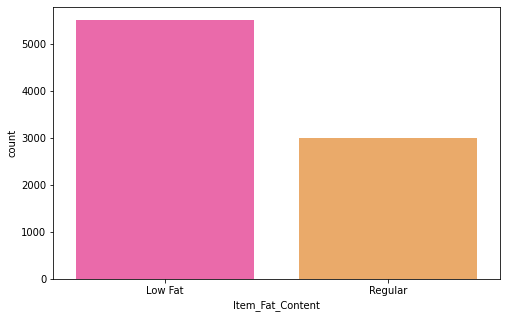

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_data, x="Item_Fat_Content", palette='spring')
plt.show()

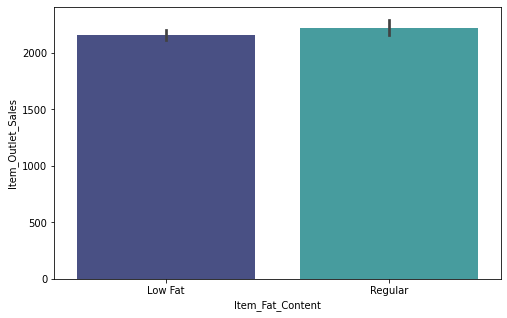

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=train_data,palette='mako')
plt.show()

# Observations:
# .The Items bought are more of Low Fat.
# .But Item Outles sales are almost same for both Low Fat and Regular Item Content

# 2. Item Type

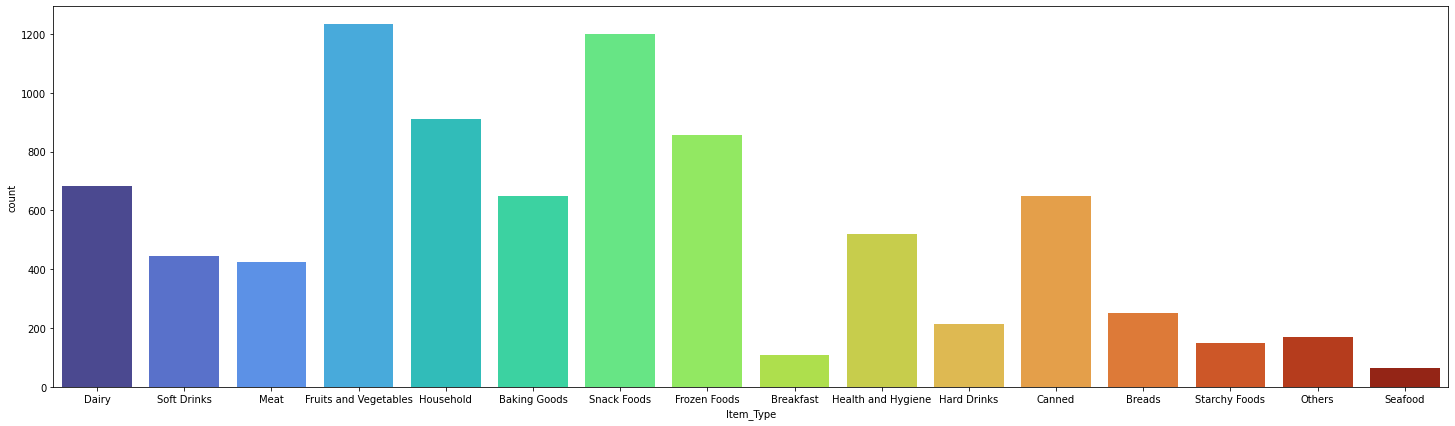

In [30]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=train_data, palette='turbo')
plt.show()


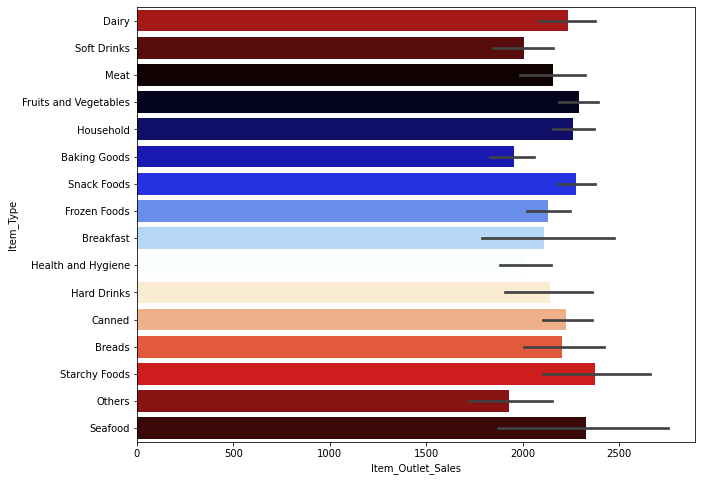

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train_data,palette='flag')
plt.show()

# Observations :
**The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers**

# 3. Outlet Size

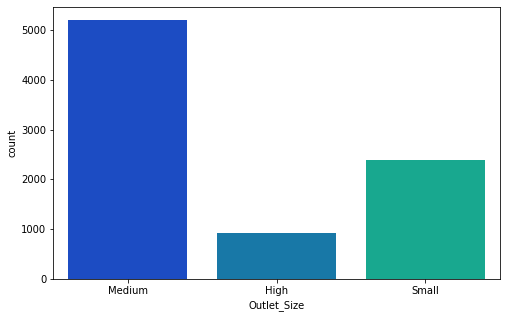

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size',data=train_data,palette='winter')
plt.show()

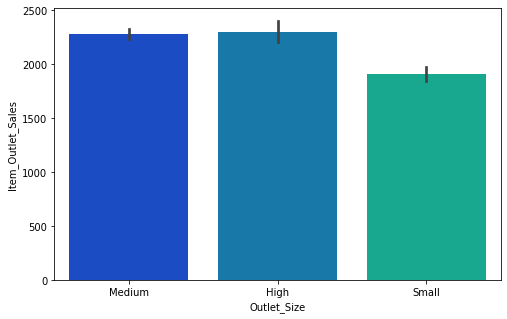

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_data,palette='winter')
plt.show()

# Observations:
**The Outlets are more of Medium Size**
**But Outlet Sales is maximum for Medium and High sized Outlets so may be with High size Outlets can improve the Outlet Sales.**

# 4. Outlet Location Type

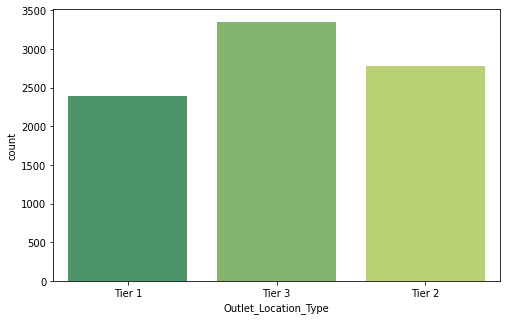

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=train_data,palette='summer')
plt.show()

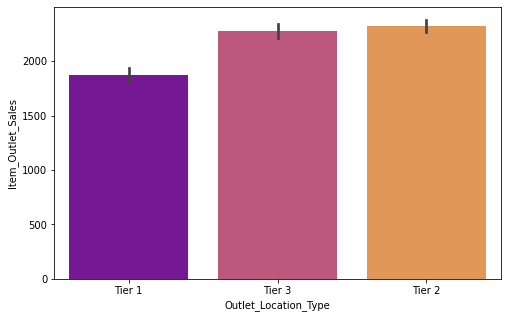

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train_data,palette='plasma')
plt.show()

# Observations:
**The Outlet Sales tend to be high for Tier3 and Tier 2 location types**
**But we have only Tier3 locations maximum Outlets**

# 5. Outlet Type

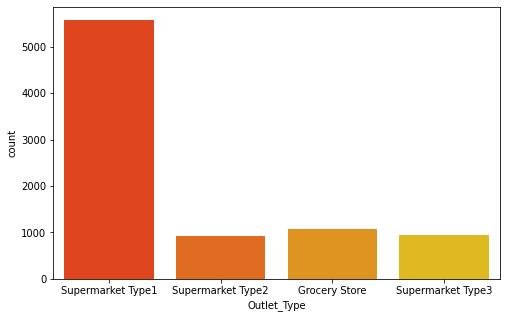

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=train_data,palette='autumn')
plt.show()

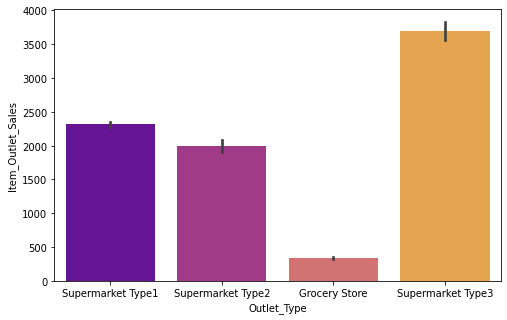

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train_data,palette='plasma')
plt.show()

# Observations:
**The Outlets are more of Supermarket Type1.**

**But sales are more on Type 3**

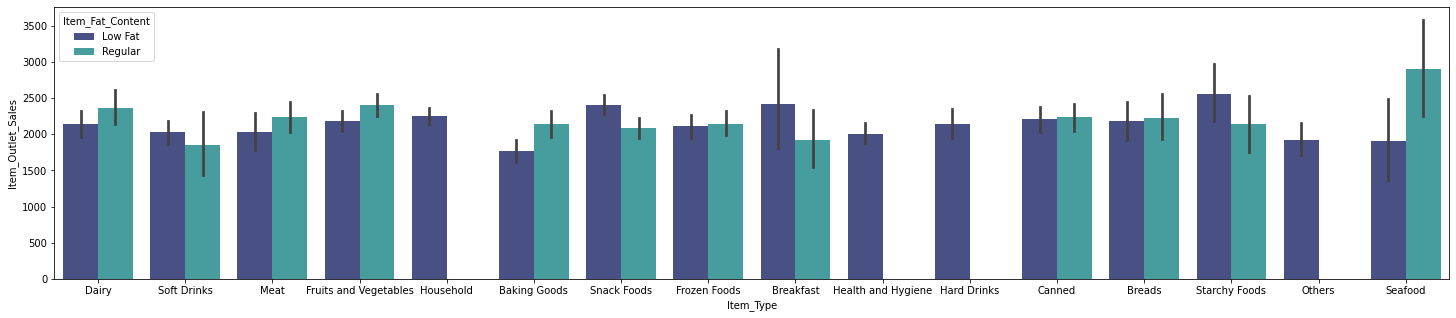

In [38]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train_data,palette='mako')
plt.show()

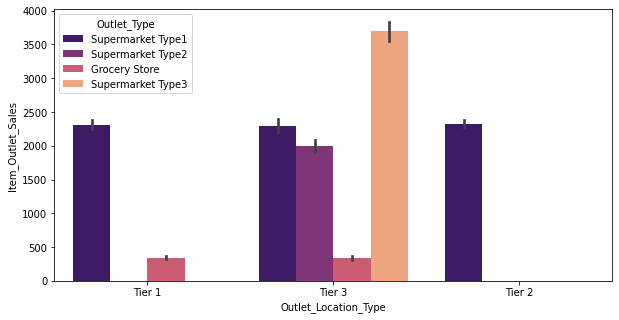

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',data=train_data,palette='magma')
plt.show()

# Observations:
**The Tier-3 location type has all types of Outlet type and has high sales margin.**
# @ Analysis on Numerical Features

In [40]:
numerical= train_data.select_dtypes(include =[float,int])
print(numerical.shape[1],"Numerical Features in Train Set :")
print('\t'+'\n\t'.join(numerical.columns)+"\n")

5 Numerical Features in Train Set :
	Item_Weight
	Item_Visibility
	Item_MRP
	Outlet_Establishment_Year
	Item_Outlet_Sales



# 1. Item Weight

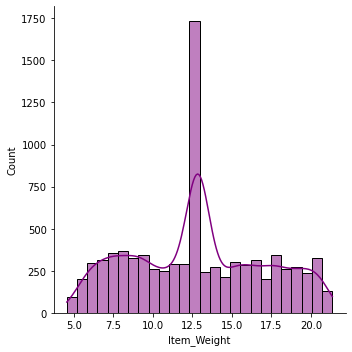

In [41]:
sns.displot(x=train_data.Item_Weight, color='purple', kde=True)

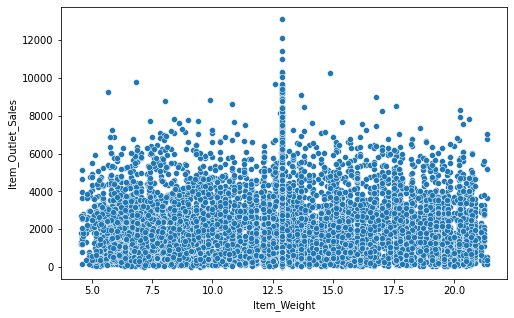

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=train_data)
plt.show()

# Observations:
**We have more products of weight around 12.5, and sell is maximum for that weight**

# 2. Item Visibility

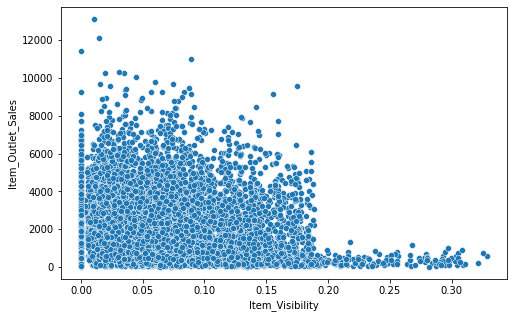

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train_data)
plt.show()

In [44]:
train_data.Item_Visibility.min()

0.0

**Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.**

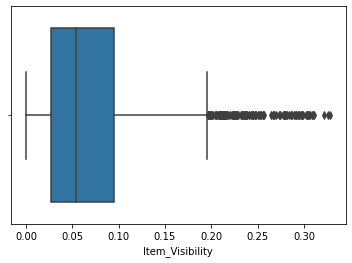

In [45]:
sns.boxplot(x="Item_Visibility", data=train_data)
plt.show()

In [46]:
train_data['Item_Visibility'].mean()

0.06613202877895108

In [47]:
train_data['Item_Visibility'].mode()

0    0.0
dtype: float64

In [48]:
train_data['Item_Visibility'].median()

0.053930934

**Lets consider it like missing information and impute it with median (as their are outlier) visibility of that product**

In [49]:
train_data['Item_Visibility']=train_data['Item_Visibility'].replace(0,train_data['Item_Visibility'].median())
test_data['Item_Visibility']=test_data['Item_Visibility'].replace(0,test_data['Item_Visibility'].median())

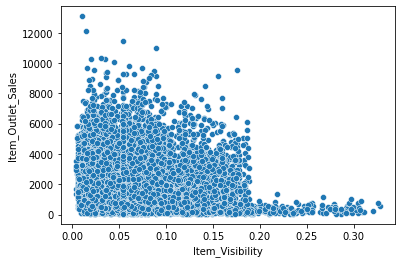

In [50]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train_data)
plt.show()

In [51]:
train_data.Item_Visibility.min()

0.003574698

**We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers**

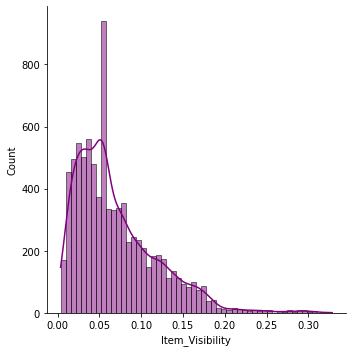

In [52]:
sns.displot(x=train_data.Item_Visibility, color='purple', kde=True)
plt.show()


# Observation:
**We have Items having Visibility 0 to 0.2 is more.**
**And Items having Visibility around 0.05 is maximum.**
**Sales is more for Items having Visibility 0 to 0.2**
**Positive skewness**

# Remove Skewness
**Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible.**

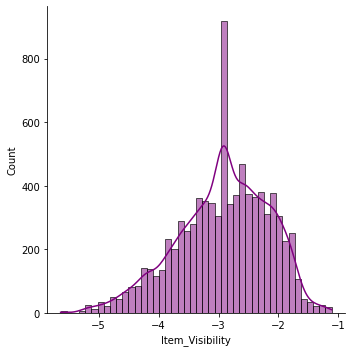

In [53]:
sns.displot(x=np.log(train_data.Item_Visibility), color='purple', kde=True)
plt.show()

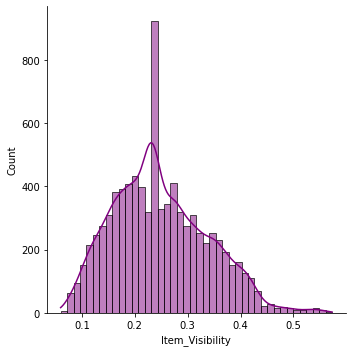

In [54]:
sns.displot(x=np.sqrt(train_data.Item_Visibility), color='purple', kde=True)
plt.show()

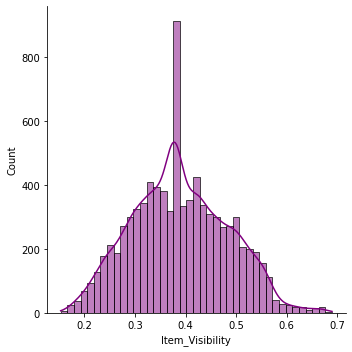

In [55]:
sns.displot(x=np.cbrt(train_data.Item_Visibility), color='purple', kde=True)
plt.show()

In [56]:
train_data['Item_Visibility'] = np.cbrt(train_data['Item_Visibility'])

# 3. Item MRP

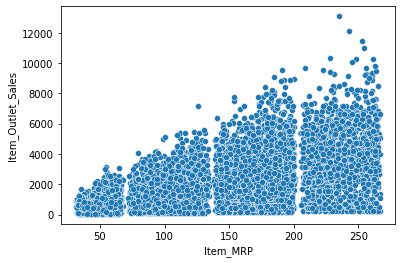

In [57]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train_data)
plt.show()

# Observations:
**We have good amount of products for 50 MRP, 100 MRP ,180 MRP**
**But MRP ranging from 200-250 dollars is having high Sales.**


# 4. Outlet Establishment Year

In [58]:
train_data['Years_Established'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 
test_data['Years_Established'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

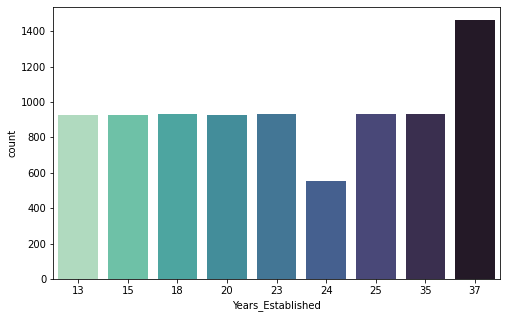

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(x='Years_Established',data=train_data,palette='mako_r')
plt.show()

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

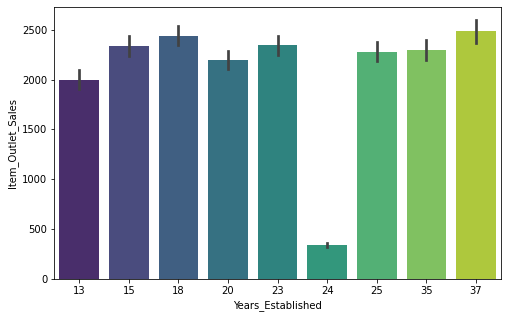

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train_data,palette='viridis')

# Observations:
**It is quiet evident that Outlets established 35 years before is having good Sales margin.**
**We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.**

# Corraltion Matrix

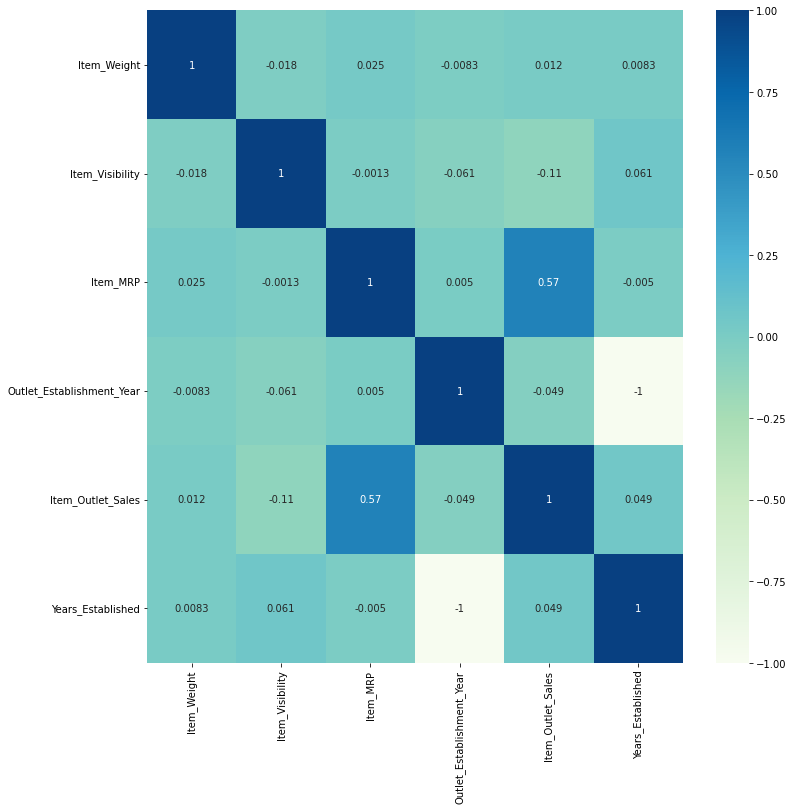

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr() ,cmap='GnBu', annot=True)
plt.show()

**We can see Item_Outlet_Sales is highly correlated with Item_MRP, i.e. if Item_MRP increases, Item_Outlet_Sales increases.**

# Feature Engineering

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

for i in categorical.columns:
    train_data[i]=le.fit_transform(train_data[i])
    
for i in categorical.columns:
    test_data[i]=le.fit_transform(test_data[i])

In [64]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.252232,4,249.8092,9,1999,1,0,1,3735.1380,23
1,8,5.92,1,0.268136,14,48.2692,3,2009,1,2,2,443.4228,13
2,662,17.50,0,0.255913,10,141.6180,9,1999,1,0,1,2097.2700,23
3,1121,19.20,1,0.377815,6,182.0950,0,1998,1,2,0,732.3800,24
4,1297,8.93,0,0.377815,9,53.8614,1,1987,0,2,1,994.7052,35


**There are some columns that needs to be dropped as they don't seem helping our analysis**

In [65]:
train_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1, inplace=True)
test_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1, inplace=True)

In [66]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,0,0.252232,4,249.8092,1,0,1,3735.1380,23
1,5.92,1,0.268136,14,48.2692,1,2,2,443.4228,13
2,17.50,0,0.255913,10,141.6180,1,0,1,2097.2700,23
3,19.20,1,0.377815,6,182.0950,1,2,0,732.3800,24
4,8.93,0,0.377815,9,53.8614,0,2,1,994.7052,35


# How We Do Prediction?

**We basically estimate the relationships between dependent & independent variables. After that we predict value of Dependent variable.**

* Dependent and Independent Variables
image.png


Here Y is dependent variable and X₁,X₂,X₃ …….,Xn are independent variable. Dependent variable is also called Outcome Variable, Response Variable and Independent Variable is also called Predictor Variable, Explanatory Variable.



* In this problem Independent variables are:

1. Item_Identifier
1. Item_Weight
1. Item_Fat_Content
1. Item_Visibility
1. Item_Type
1. Item_MRP
1. Outlet_Identifier
1. Outlet_Establishment_Year
1. Outlet_Size
1. Outlet_Location_Type
1. Outlet_Type

**Dependent Variable:**
1. Item_Outlet_Sales

We have to predict value of Item_Outlet_Sales

In [67]:
X = train_data.drop(columns=["Item_Outlet_Sales"])        # Independent Variables
y = train_data.Item_Outlet_Sales                          # Dependent Variables

#                   Feature Scaling

Scaling the features makes the flow of gradient descent smooth and helps algorithms quickly reach the minima of the cost function. Without scaling features, the algorithm may be biased toward the feature which has values higher in magnitude.

Feature scaling is important for every algorithm where distance matter. Two famous techniques for Feature Scaling are:

1. Normalization
1. Standardization

*Normalization:*
In this approach we scale down the features between 0 and 1.

**Standardization (Z-Score Normalization)**

Here we scale down the features in such a way that it will have the properties of standard normal distribution with mean 0 standard deviation 1.

Standardization is useful when the feature distribution is Normal or Gaussian, otherwise we do Normalization.



In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 1. Item Weight

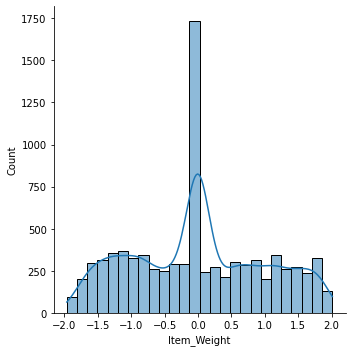

In [69]:
standard_Item_Weight = StandardScaler()
standard_Item_Weight.fit(X[['Item_Weight']])

X['Item_Weight'] =  standard_Item_Weight.transform(X[['Item_Weight']])
sns.displot(X.Item_Weight, kde=True)
plt.show()


In [70]:
standard_Item_Weight.mean_

array([12.85764518])

# 2. Item Visibility

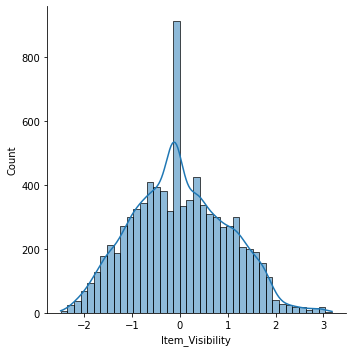

In [71]:
standard_Item_Visibility = StandardScaler()
X['Item_Visibility'] = standard_Item_Visibility.fit_transform(X[['Item_Visibility']])
sns.displot(X.Item_Visibility, kde=True)
plt.show()

In [72]:
standard_Item_Visibility.mean_

array([0.38903291])

In [73]:
test_data['Item_Visibility'] = standard_Item_Visibility.transform(test_data[['Item_Visibility']])

# 3. Item MRP

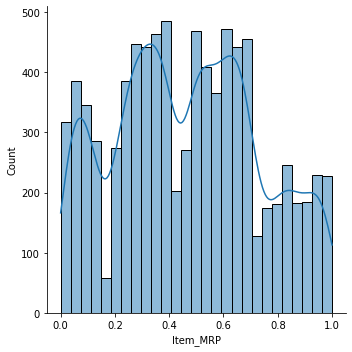

In [74]:
normal_Item_MRP = MinMaxScaler()
X['Item_MRP'] = normal_Item_MRP.fit_transform(X[['Item_MRP']])
sns.displot(X.Item_MRP, kde=True)
plt.show()


In [75]:
test_data['Item_MRP'] = normal_Item_MRP.transform(test_data[['Item_MRP']])

In [76]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750000,0,-4.033762,13,0.325012,1,0,1,23
1,8.300000,1,-3.707409,4,0.237819,1,1,1,15
2,14.600000,0,-3.060819,11,0.893316,1,2,0,24
3,7.315000,0,-3.951034,13,0.525233,1,1,1,15
4,12.695633,1,-2.859649,4,0.861381,1,2,3,37


# Model Training

In [77]:
def score(model, X=X, y=y):
    print("Average R2 Score :", np.average(cross_val_score(model, X, y, cv=10)))
    print("Average Root Mean Square Error :", np.average(cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')))

# Learning Curve

A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

If the estimator is more sensitive to error due to variance vs. error due to bias.

In [78]:
from yellowbrick.model_selection import LearningCurve

def learning_curve(model, X=X, y=y):
    visualizer = LearningCurve(model, scoring='r2')
    visualizer.fit(X, y)       
    visualizer.show()
    plt.show()

In [79]:
from yellowbrick.regressor import prediction_error

In [80]:
from yellowbrick.regressor import ResidualsPlot

def residuals_plot(model, X_train_data, y_traina_data, X_test_data, y_test_data):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train_data, y_train_data)
    visualizer.score(X_test_data, y_test_data)
    visualizer.show()

In [81]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR = LinearRegression(positive=True)
LR.fit(X,y)

score(LR)

Average R2 Score : 0.4825351933951542
Average Root Mean Square Error : -1225.8561623734372


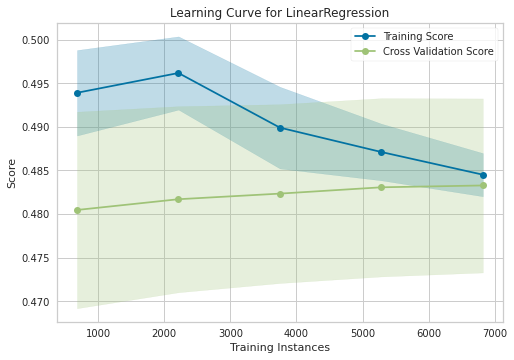

In [83]:
learning_curve(LR, X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


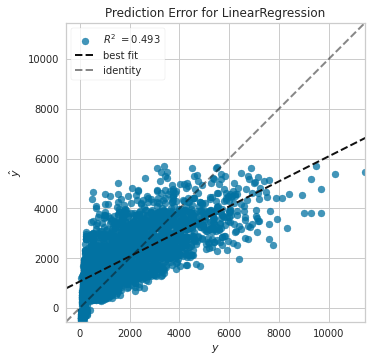

In [84]:
visualizer = prediction_error(LR, X_train_data, y_train_data, X_test_data, y_test_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


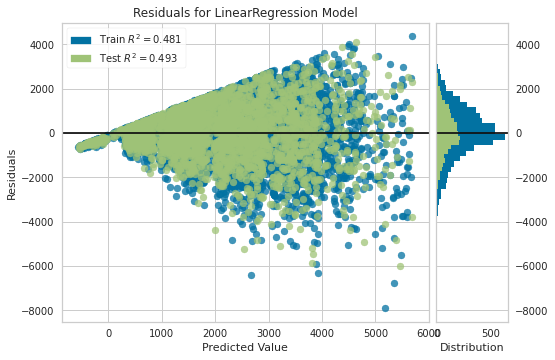

In [85]:
residuals_plot(LR, X_train_data, y_train_data, X_test_data, y_test_data)

# 2. Polynomial Regression

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

PR = LinearRegression(positive=True)
PR.fit(X_poly, y)

score(PR, X_poly, y)

Average R2 Score : 0.5248574473923222
Average Root Mean Square Error : -1174.1912700138423


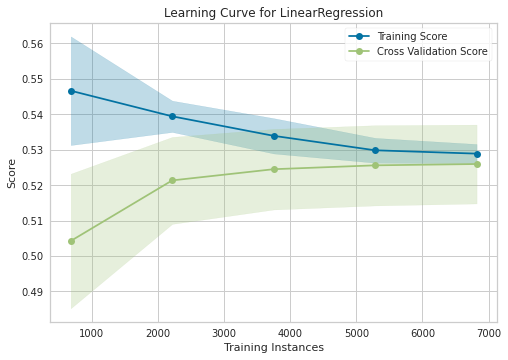

In [87]:
learning_curve(PR, X_poly, y)

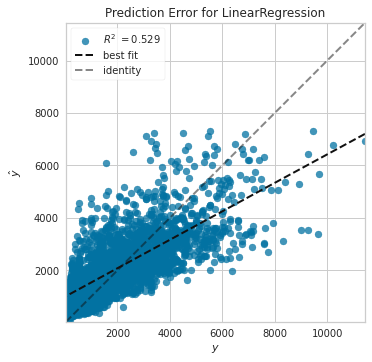

In [88]:
from yellowbrick.regressor import prediction_error

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

visualizer = prediction_error(PR, X_train_poly, y_train_poly, X_test_poly, y_test_poly)

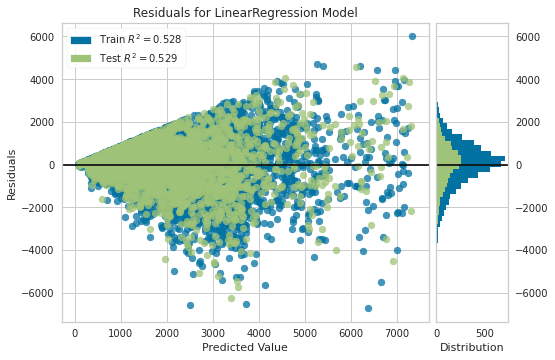

In [89]:
residuals_plot(PR, X_train_poly, y_train_poly, X_test_poly, y_test_poly)

In [90]:
poly_2 = PolynomialFeatures(2)
X_poly_2 = poly_2.fit_transform(X)

PR_2 = LinearRegression(positive=True)
PR_2.fit(X_poly_2, y)

score(PR_2, X_poly_2, y)

Average R2 Score : 0.5178999906988736
Average Root Mean Square Error : -1182.9062732044733


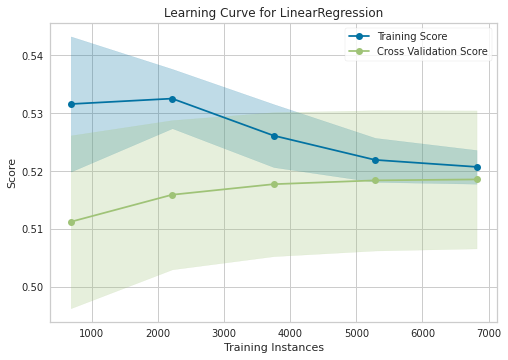

In [91]:
learning_curve(PR_2, X_poly_2, y)

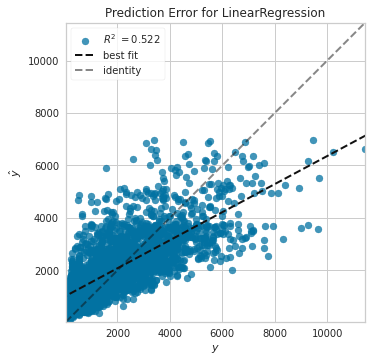

In [92]:
X_train_poly_2, X_test_poly_2, y_train_poly_2, y_test_poly_2 = train_test_split(X_poly_2, y, test_size=0.3, random_state=42)

visualizer = prediction_error(PR_2, X_train_poly_2, y_train_poly_2, X_test_poly_2, y_test_poly_2)

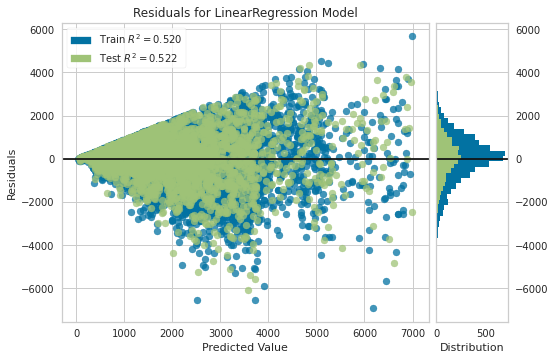

In [93]:
residuals_plot(PR_2, X_train_poly_2, y_train_poly_2, X_test_poly_2, y_test_poly_2)

# 3. Ridge Regression

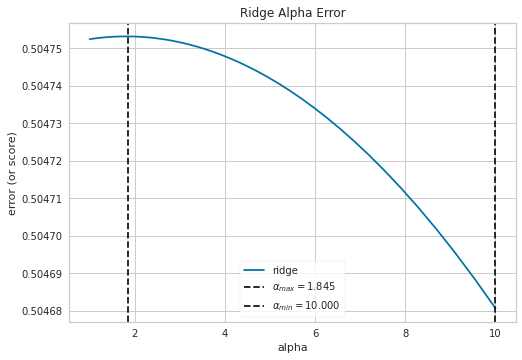

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [94]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(1, .001, 50)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=12,
    scoring="r2"
)

visualizer.fit(X, y)
visualizer.show()

In [95]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rg = Ridge(alpha=1.84, positive=True)
rg.fit(X,y)

score(rg)

Average R2 Score : 0.4821802470291717
Average Root Mean Square Error : -1226.264772436701


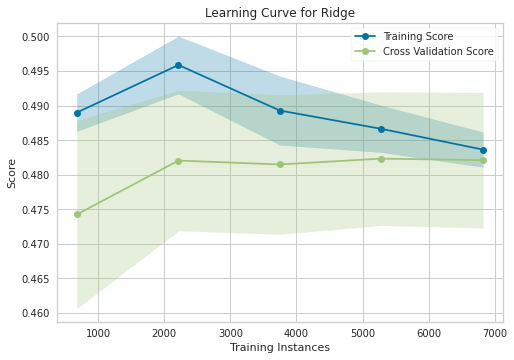

In [96]:
learning_curve(rg)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


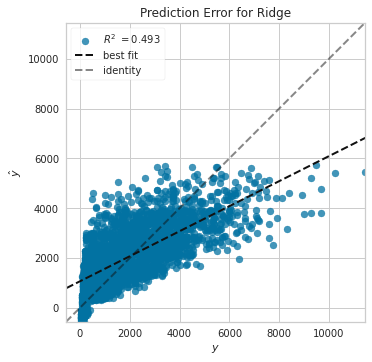

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=Ridge(alpha=1.84, positive=True))

In [97]:
prediction_error(rg, X_train_data, y_train_data, X_test_data, y_test_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


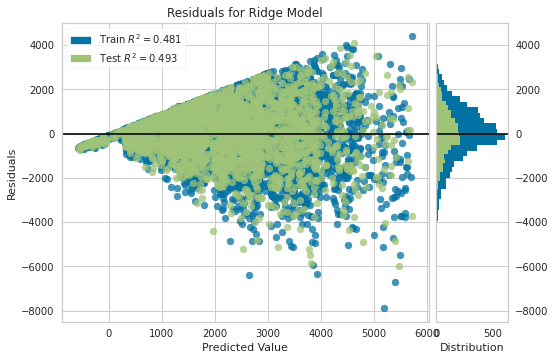

In [98]:
residuals_plot(rg, X_train_data, y_train_data, X_test_data, y_test_data)

# 4. Lasso Regression

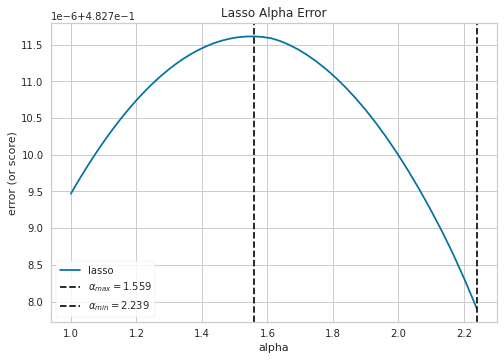

<AxesSubplot:title={'center':'Lasso Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [99]:
from sklearn.linear_model import Lasso

alphas = np.logspace(0, 0.35, 50)

visualizer = ManualAlphaSelection(
    Lasso(positive=True),
    alphas=alphas,
    cv=12,
    scoring="r2"
)

visualizer.fit(X, y)
visualizer.show()

In [100]:
from sklearn.metrics import mean_squared_error

ls = Lasso(alpha=1.58, positive=True)
ls.fit(X,y)

score(ls)

Average R2 Score : 0.4825553592709074
Average Root Mean Square Error : -1225.848966067305


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


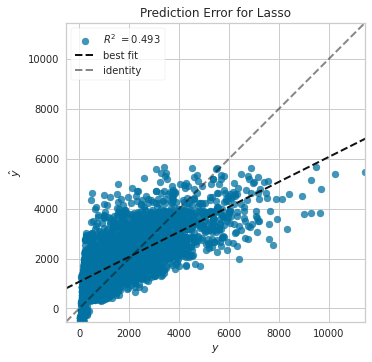

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=Lasso(alpha=1.58, positive=True))

In [101]:
prediction_error(ls, X_train_data, y_train_data, X_test_data, y_test_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


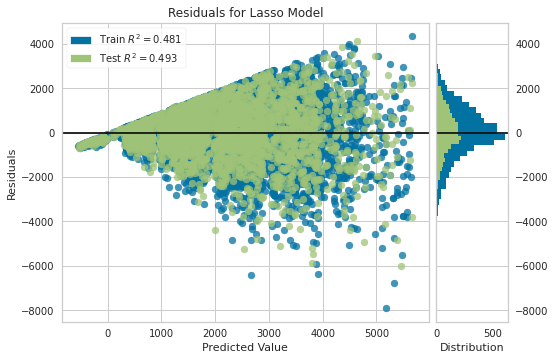

In [102]:
residuals_plot(ls, X_train_data, y_train_data, X_test_data, y_test_data)

# 5. Random Forest Regressor

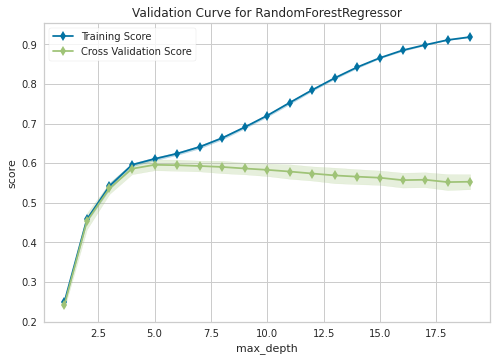

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_depth', ylabel='score'>

In [103]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestRegressor

viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 20), cv=5, scoring="r2"
)

viz.fit(X, y)
viz.show()

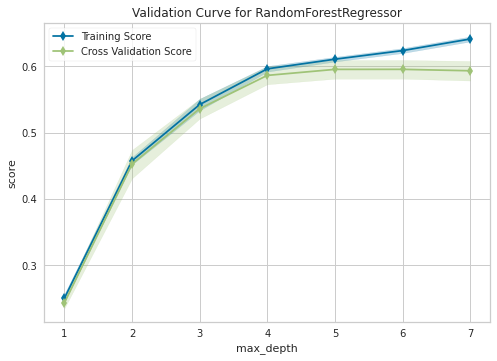

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_depth', ylabel='score'>

In [104]:
viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 8), cv=5, scoring="r2"
)

viz.fit(X, y)
viz.show()

We see that R2 score decreases after depth 5. So for the best Result we are taking max_depth=5

In [105]:
rfr = RandomForestRegressor(max_depth=5, random_state=5)
rfr.fit(X,y)

score(rfr)

Average R2 Score : 0.595680819809614
Average Root Mean Square Error : -1082.8528603821146


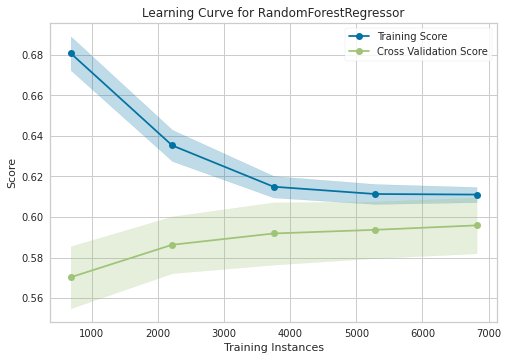

In [106]:
learning_curve(rfr)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


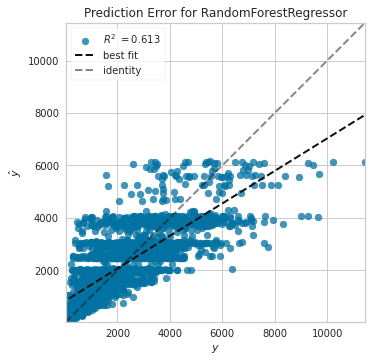

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=RandomForestRegressor(max_depth=5, random_state=5))

In [107]:
prediction_error(rfr, X_train_data, y_train_data, X_test_data, y_test_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


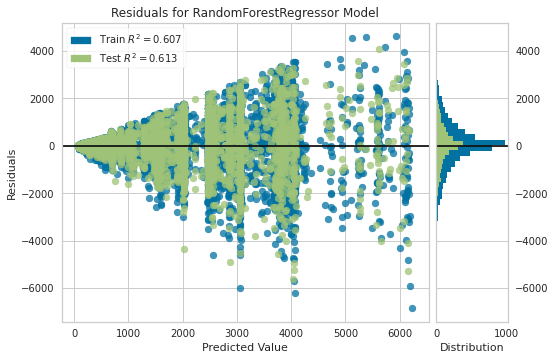

In [108]:
residuals_plot(rfr, X_train_data, y_train_data, X_test_data, y_test_data)